In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/Users/sahilagrawal/Documents/IT/Data Analytics/Proj/Economic-Pulse/Data/realannualcommoditybasedexchangerates_1_.csv")
full_df = pd.read_csv("/Users/sahilagrawal/Documents/IT/Data Analytics/Proj/Economic-Pulse/Data/full-data.csv")
full_df.head()

,Year,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,...,10 Yr,20 Yr,30 Yr,GDP growth,Commodity_x,Weights_x,Value_x,Commodity_y,Weights_y,Value_y
0,1990,NaN,NaN,7.74648,NaN,7.853,7.88724,8.1616,8.25764,8.37328,...,8.5524,NaN,8.61,1.9,Bulk,U.S. competitors (country export weights),86.274719,Bulk,U.S. competitors (country export weights),86.274719
1,1990,NaN,NaN,7.74648,NaN,7.853,7.88724,8.1616,8.25764,8.37328,...,8.5524,NaN,8.61,1.9,Bulk,U.S. competitors (country export weights),86.274719,Consumer oriented,U.S. competitors (country export weights),86.054863
2,1990,NaN,NaN,7.74648,NaN,7.853,7.88724,8.1616,8.25764,8.37328,...,8.5524,NaN,8.61,1.9,Bulk,U.S. competitors (country export weights),86.274719,Intermediates,U.S. competitors (country export weights),84.863716
3,1990,NaN,NaN,7.74648,NaN,7.853,7.88724,8.1616,8.25764,8.37328,...,8.5524,NaN,8.61,1.9,Bulk,U.S. competitors (country export weights),86.274719,Beef and beef products,U.S. competitors (country export weights),84.718597
4,1990,NaN,NaN,7.74648,NaN,7.853,7.88724,8.1616,8.25764,8.37328,...,8.5524,NaN,8.61,1.9,Bulk,U.S. competitors (country export weights),86.274719,Competitor agricultural exports to the world,U.S. competitors (country export weights),89.298264


In [3]:
print(df.isna().values.sum())

0


In [4]:
print(full_df.isna().sum())
print(full_df.shape)

Year                0
1 Mo            71188
2 Mo           164280
3 Mo            10952
4 Mo           186184
6 Mo            10952
1 Yr            10952
2 Yr            10952
3 Yr            10952
5 Yr            10952
7 Yr            10952
10 Yr           10952
20 Yr           27380
30 Yr           27380
GDP growth      10952
Commodity_x         0
Weights_x           0
Value_x             0
Commodity_y         0
Weights_y           0
Value_y             0
dtype: int64
(186184, 21)


# Preprocessing fully merged data

In [5]:
new_df = full_df.drop(columns = ['1 Mo', '2 Mo', '4 Mo'])
new_df.shape

(186184, 18)

In [6]:
#Will use ffill for these data since it is like time series data
for column in ['3 Mo', '6 Mo', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr', '10 Yr', '20 Yr', '30 Yr']:
    new_df[column] = new_df[column].fillna(method='ffill')


In [7]:
#For GDP growth impute the value with mean
new_df['GDP growth'] = new_df['GDP growth'].fillna(new_df['GDP growth'].mean())

In [8]:
# Apply forward fill
new_df['20 Yr'] = new_df['20 Yr'].fillna(method='ffill')

# Applying this since it has null values in the beginning
new_df['20 Yr'] = new_df['20 Yr'].fillna(method='bfill')

In [9]:
#Check missing values now
print(new_df.isna().sum())


Year           0
3 Mo           0
6 Mo           0
1 Yr           0
2 Yr           0
3 Yr           0
5 Yr           0
7 Yr           0
10 Yr          0
20 Yr          0
30 Yr          0
GDP growth     0
Commodity_x    0
Weights_x      0
Value_x        0
Commodity_y    0
Weights_y      0
Value_y        0
dtype: int64


In [10]:
new_df.head()

,Year,3 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr,GDP growth,Commodity_x,Weights_x,Value_x,Commodity_y,Weights_y,Value_y
0,1990,7.74648,7.853,7.88724,8.1616,8.25764,8.37328,8.51884,8.5524,6.285968,8.61,1.9,Bulk,U.S. competitors (country export weights),86.274719,Bulk,U.S. competitors (country export weights),86.274719
1,1990,7.74648,7.853,7.88724,8.1616,8.25764,8.37328,8.51884,8.5524,6.285968,8.61,1.9,Bulk,U.S. competitors (country export weights),86.274719,Consumer oriented,U.S. competitors (country export weights),86.054863
2,1990,7.74648,7.853,7.88724,8.1616,8.25764,8.37328,8.51884,8.5524,6.285968,8.61,1.9,Bulk,U.S. competitors (country export weights),86.274719,Intermediates,U.S. competitors (country export weights),84.863716
3,1990,7.74648,7.853,7.88724,8.1616,8.25764,8.37328,8.51884,8.5524,6.285968,8.61,1.9,Bulk,U.S. competitors (country export weights),86.274719,Beef and beef products,U.S. competitors (country export weights),84.718597
4,1990,7.74648,7.853,7.88724,8.1616,8.25764,8.37328,8.51884,8.5524,6.285968,8.61,1.9,Bulk,U.S. competitors (country export weights),86.274719,Competitor agricultural exports to the world,U.S. competitors (country export weights),89.298264


# Exploratory Data Analysis

In [11]:
#Visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#Get summary statistics
print(new_df.describe())


                Year           3 Mo           6 Mo           1 Yr  \
count  186184.000000  186184.000000  186184.000000  186184.000000   
mean     2006.500000       2.466071       2.585251       2.701985   
std         9.810735       2.278625       2.321230       2.329567   
min      1990.000000       0.032720       0.063904       0.103984   
25%      1998.000000       0.138446       0.196773       0.322709   
50%      2006.500000       1.803503       1.912900       2.026960   
75%      2015.000000       4.777211       4.945817       5.052520   
max      2023.000000       7.746480       7.853000       7.887240   

                2 Yr           3 Yr           5 Yr           7 Yr  \
count  186184.000000  186184.000000  186184.000000  186184.000000   
mean        2.986135       3.198351       3.588880       3.895991   
std         2.363102       2.322005       2.225752       2.146632   
min         0.265458       0.382280       0.533068       0.721833   
25%         0.686773       1.0040

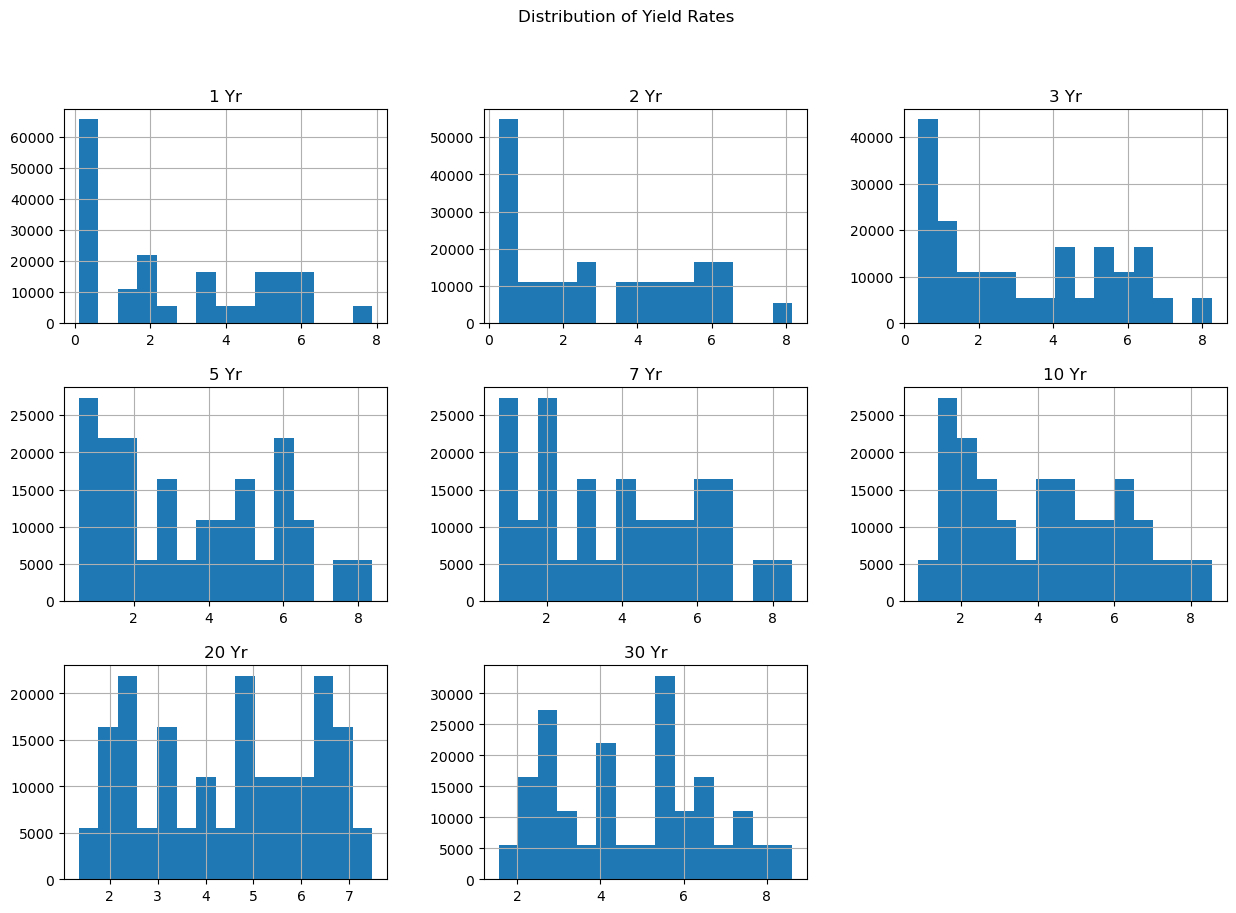

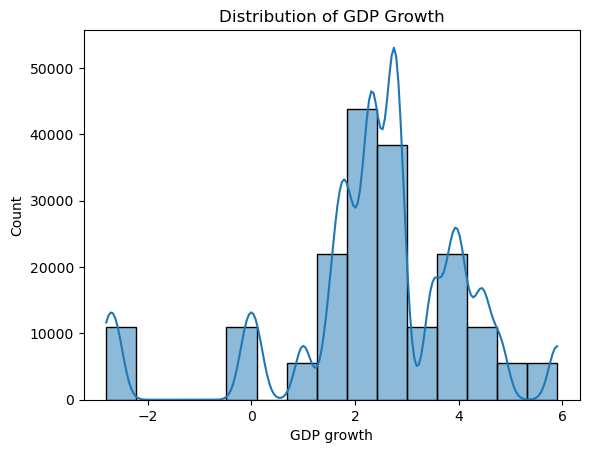

In [13]:
# Histograms for yield rates
yield_rate_columns = ['1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr', '10 Yr', '20 Yr', '30 Yr']
new_df[yield_rate_columns].hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribution of Yield Rates')
plt.show()

# Histogram for GDP growth
sns.histplot(new_df['GDP growth'], bins=15, kde=True)
plt.title('Distribution of GDP Growth')
plt.show()

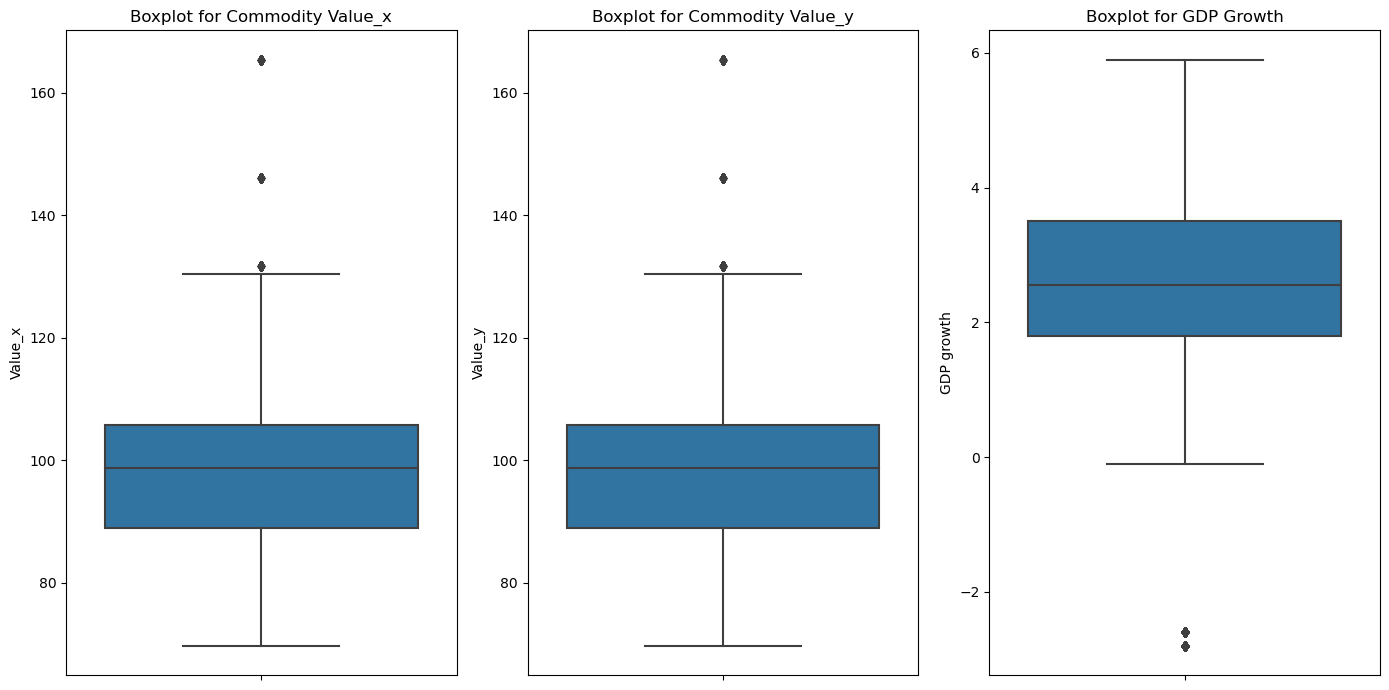

In [14]:
#Box Plot for GDP and commodity prices over years

# Set up the matplotlib figure
plt.figure(figsize=(14, 7))

# Boxplot for Value_x
plt.subplot(1, 3, 1)
sns.boxplot(y=new_df['Value_x'])
plt.title('Boxplot for Commodity Value_x')

# Boxplot for Value_y
plt.subplot(1, 3, 2)
sns.boxplot(y=new_df['Value_y'])
plt.title('Boxplot for Commodity Value_y')

# Boxplot for GDP Growth
plt.subplot(1, 3, 3)
sns.boxplot(y=new_df['GDP growth'])
plt.title('Boxplot for GDP Growth')

plt.tight_layout()
plt.show()


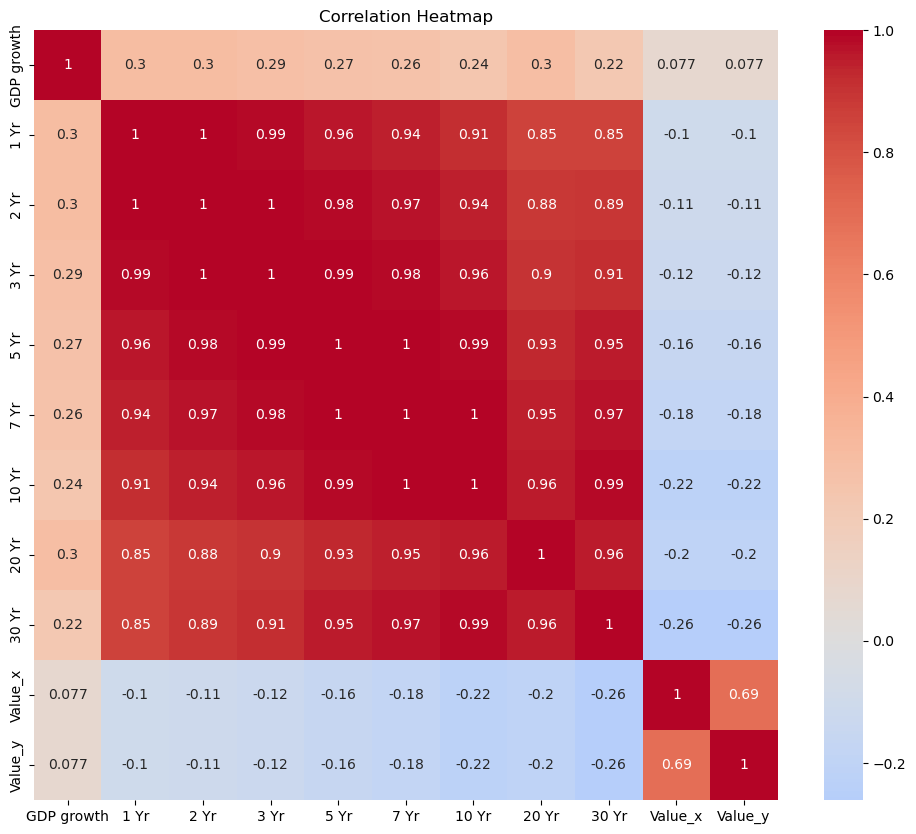

In [15]:
# Correlation matrix for GDP growth, Yield Rates, and Commodity Values
correlation_matrix = new_df[['GDP growth', '1 Yr', '2 Yr', '3 Yr', '5 Yr', '7 Yr', '10 Yr', '20 Yr', '30 Yr', 'Value_x', 'Value_y']].corr()

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()


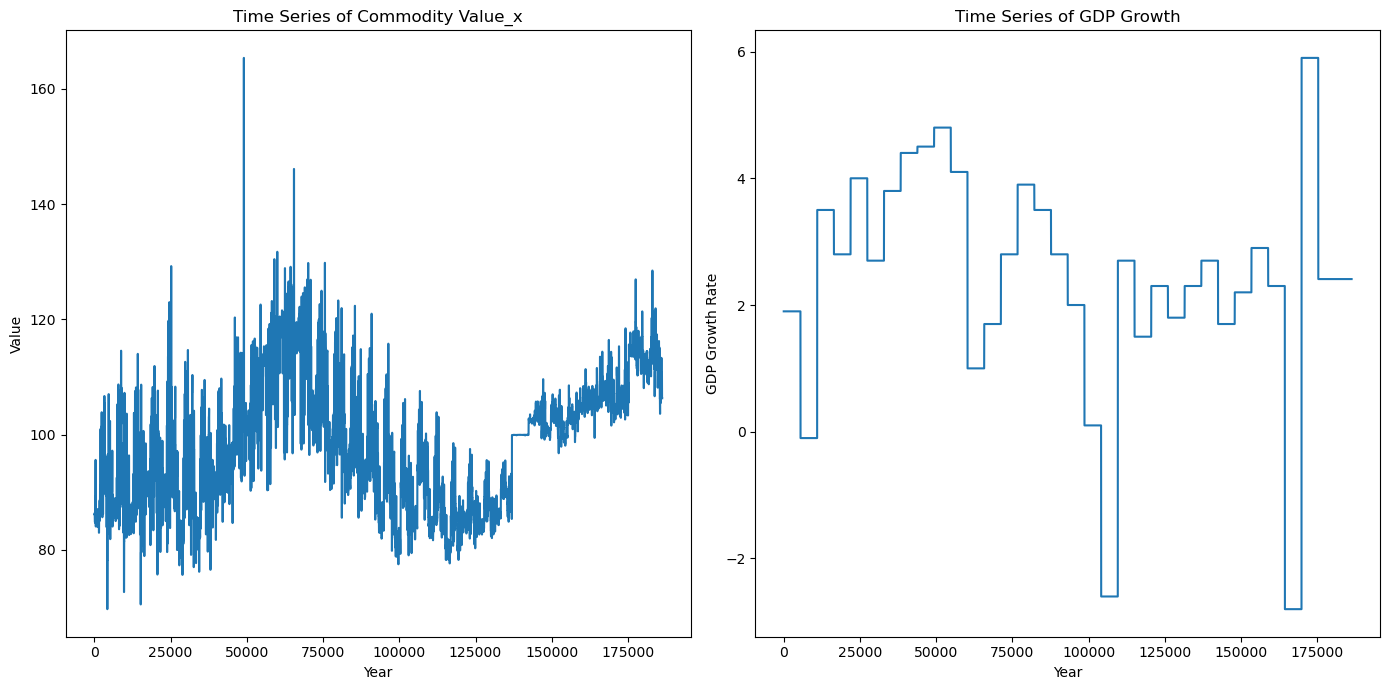

In [16]:
#Time Series plot

plt.figure(figsize=(14, 7))

# Plot for Value_x
plt.subplot(1, 2, 1)
new_df['Value_x'].plot()
plt.title('Time Series of Commodity Value_x')
plt.xlabel('Year')
plt.ylabel('Value')

# Plot for GDP Growth
plt.subplot(1, 2, 2)
new_df['GDP growth'].plot()
plt.title('Time Series of GDP Growth')
plt.xlabel('Year')
plt.ylabel('GDP Growth Rate')

plt.tight_layout()
plt.show()


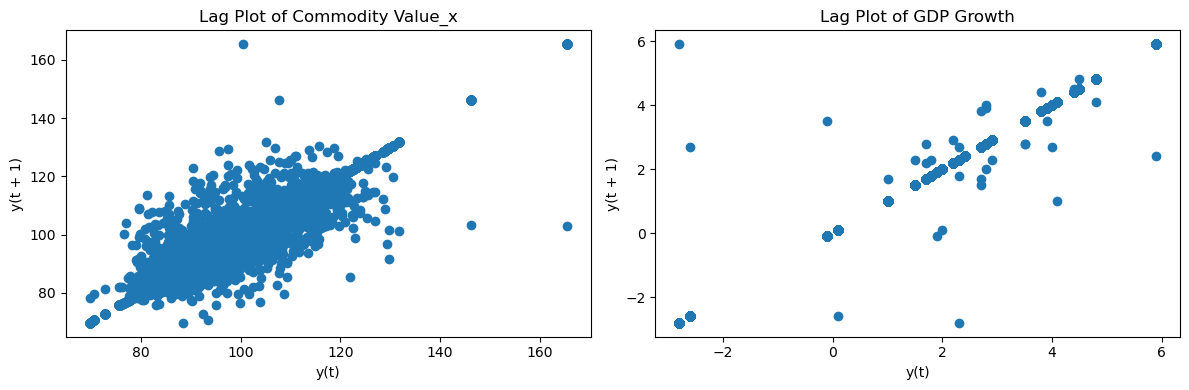

In [17]:
from pandas.plotting import lag_plot

plt.figure(figsize=(12, 4))

# Lag plot for Value_x
plt.subplot(1, 2, 1)
lag_plot(new_df['Value_x'])
plt.title('Lag Plot of Commodity Value_x')

# Lag plot for GDP Growth
plt.subplot(1, 2, 2)
lag_plot(new_df['GDP growth'])
plt.title('Lag Plot of GDP Growth')

plt.tight_layout()
plt.show()


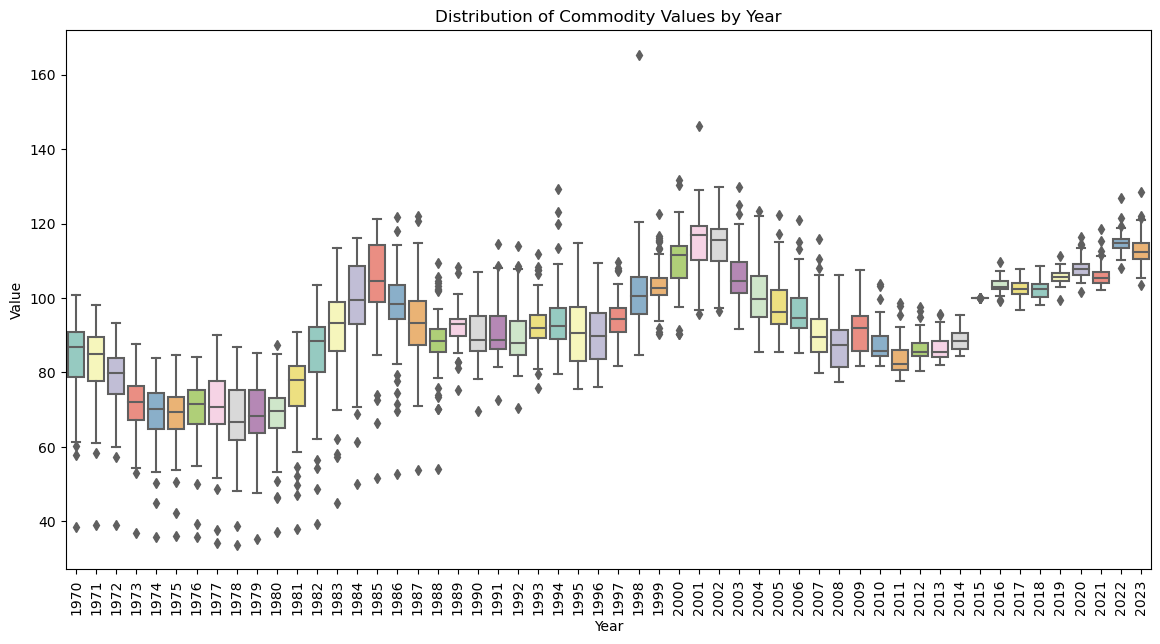

In [18]:
#Box plot over years
plt.figure(figsize=(14, 7))
sns.boxplot(x='Year', y='Value', data=df, palette="Set3")
plt.title('Distribution of Commodity Values by Year')
plt.xticks(rotation=90)
plt.show()

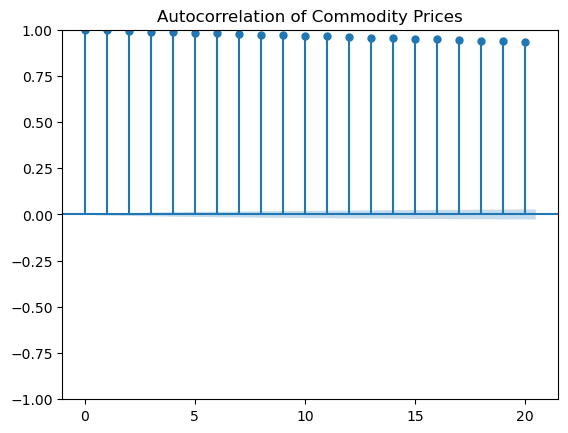

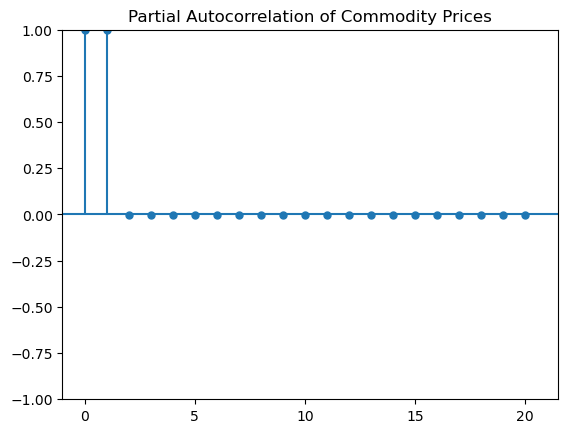

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Autocorrelation plot
plot_acf(new_df['Value_x'].dropna(), lags=20)
plt.title('Autocorrelation of Commodity Prices')
plt.show()

# Partial Autocorrelation plot
plot_pacf(new_df['Value_x'].dropna(), lags=20)
plt.title('Partial Autocorrelation of Commodity Prices')
plt.show()

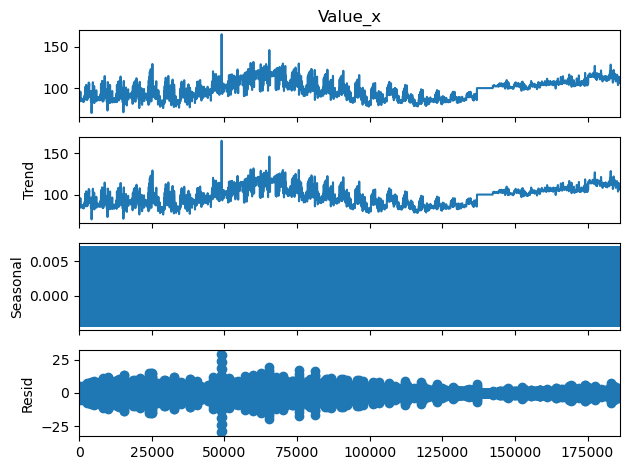

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(new_df['Value_x'].dropna(), model='additive', period=12)

# Plot the decomposed time series
decomposition.plot()
plt.show()

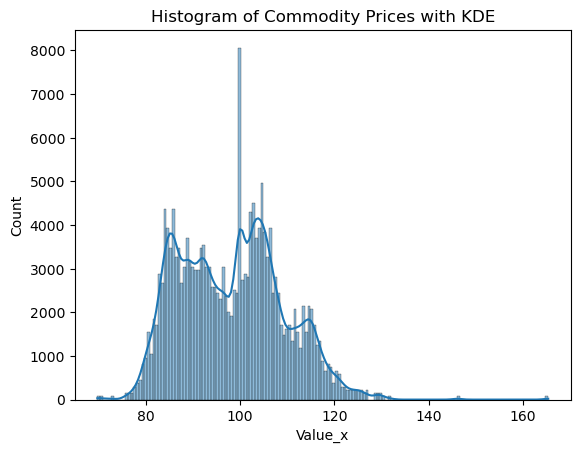

In [28]:
# Histogram with a Kernel Density Estimate (KDE)
sns.histplot(new_df['Value_x'], kde=True)
plt.title('Histogram of Commodity Prices with KDE')
plt.show()

## Based on above EDA's, I've encountered these things

- The boxplot for GDP growth indicates that most of the growth rates are positive, with a few outliers on the lower end, which likely correspond to recession years.
- The heatmap shows that the different maturity terms of the yield rates are highly correlated with each other, which is expected as they often move in with market changes.
- There is a weak positive correlation between GDP growth and the yield rates, suggesting that when GDP grows, interest rates may also increase, though the correlation is not strong.
- The correlation between GDP growth and Value_x or Value_y is also weak, indicating that GDP growth alone may not be a strong predictor of commodity prices in your model.
- The time series plot for Commodity Value_x shows fluctuations over time, which could be seasonal or cyclic in nature.
- The lag plot for GDP Growth shows a positive trend, indicating that there's also autocorrelation present; years of growth tend to follow other years of growth, and similarly for downturns.

# Feature Engineering

In [19]:
# Yield curve slope (difference between long-term and short-term rates)
new_df['yield_curve_slope'] = new_df['10 Yr'] - new_df['2 Yr']

# Yield curve curvature (mid-term rate - average of short-term and long-term rates)
new_df['yield_curve_curvature'] = new_df['5 Yr'] - (new_df['2 Yr'] + new_df['10 Yr']) / 2


In [20]:
# One-hot encoding of commodity types
commodity_dummies = pd.get_dummies(new_df['Commodity_x'], prefix='commodity')
new_df = pd.concat([new_df, commodity_dummies], axis=1)


In [21]:
# Rate of change for commodity prices
new_df['Value_x_rate_change'] = new_df['Value_x'].pct_change()
new_df['Value_y_rate_change'] = new_df['Value_y'].pct_change()

In [22]:
# Discretize the GDP growth into bins
new_df['GDP growth_bins'] = pd.cut(new_df['GDP growth'], bins=[-np.inf, 0, 2, 4, np.inf], labels=[1, 2, 3, 4])


In [23]:
# Export new_df to a CSV file
new_df.to_csv("/Users/sahilagrawal/Documents/IT/Data Analytics/Proj/Economic-Pulse/Data/processed_data.csv", index=False)
